In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
# initial dataframe exploration and cleaning was done in R

# inpatient= pd.read_csv('inpatient.csv')
# outpatient= pd.read_csv('outpatient.csv')
# bene = pd.read_csv('bene.csv')

In [429]:
# provider_potential = pd.read_csv('Train-1542865627584.csv')

In [69]:
outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,total_chronic,DOB,Age,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,0,56409,0,1936-09-01,73,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,0,79380,2,1936-08-01,73,No
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,0,NaN,2,1936-08-01,73,No
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,0,NaN,6,1922-07-01,87,Yes
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,0,71947,6,1922-07-01,87,Yes


In [70]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,total_chronic,DOB,Age,PotentialFraud,days_admitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,7,1943-01-01,66,Yes,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,NaN,7,1943-01-01,67,No,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,7,1943-01-01,67,No,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,NaN,NaN,NaN,NaN,NaN,6,1914-03-01,95,No,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,NaN,NaN,NaN,NaN,NaN,5,1938-04-01,71,No,17


In [71]:
bene.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,total_chronic
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,7
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,0
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,2
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,6
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,2


Remove extra columns

In [72]:
bene = bene.drop(['DOB','DOD','NoOfMonths_PartACov','NoOfMonths_PartBCov'], axis=1)

In [73]:
inpatient = inpatient.drop('ClmProcedureCode_6', axis=1)

In [74]:
outpatient = outpatient.drop(['ClmProcedureCode_5','ClmProcedureCode_6'], axis=1)

Consolidate Claim Diagnosis counts

In [78]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [88]:
inpatient['ClmDiagnosisCode_1'] = np.where(inpatient.ClmDiagnosisCode_1.isnull(), 0, 1)

In [89]:
inpatient['ClmDiagnosisCode_2'] = np.where(inpatient.ClmDiagnosisCode_2.isnull(), 0, 1)

In [90]:
inpatient['ClmDiagnosisCode_3'] = np.where(inpatient.ClmDiagnosisCode_3.isnull(), 0, 1)

In [91]:
inpatient['ClmDiagnosisCode_4'] = np.where(inpatient.ClmDiagnosisCode_4.isnull(), 0, 1)

In [92]:
inpatient['ClmDiagnosisCode_5'] = np.where(inpatient.ClmDiagnosisCode_5.isnull(), 0, 1)

In [93]:
inpatient['ClmDiagnosisCode_6'] = np.where(inpatient.ClmDiagnosisCode_6.isnull(), 0, 1)

In [94]:
inpatient['ClmDiagnosisCode_7'] = np.where(inpatient.ClmDiagnosisCode_7.isnull(), 0, 1)

In [95]:
inpatient['ClmDiagnosisCode_8'] = np.where(inpatient.ClmDiagnosisCode_8.isnull(), 0, 1)

In [96]:
inpatient['ClmDiagnosisCode_9'] = np.where(inpatient.ClmDiagnosisCode_9.isnull(), 0, 1)

In [84]:
inpatient['ClmDiagnosisCode_10'] = np.where(inpatient.ClmDiagnosisCode_10.isnull(), 0, 1)

In [98]:
inpatient['Claim_Diag_Total'] = inpatient['ClmDiagnosisCode_1'] + inpatient['ClmDiagnosisCode_2'] + \
inpatient['ClmDiagnosisCode_3']+ inpatient['ClmDiagnosisCode_4'] + inpatient['ClmDiagnosisCode_5'] + \
inpatient['ClmDiagnosisCode_6']+ inpatient['ClmDiagnosisCode_7'] + inpatient['ClmDiagnosisCode_8'] + \
inpatient['ClmDiagnosisCode_9']+ inpatient['ClmDiagnosisCode_10']

In [100]:
inpatient = inpatient.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                           'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10'], axis=1)

In [214]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   BeneID                 40474 non-null  object         
 1   ClaimID                40474 non-null  object         
 2   ClaimStartDt           40474 non-null  datetime64[ns] 
 3   ClaimEndDt             40474 non-null  datetime64[ns] 
 4   Provider               40474 non-null  object         
 5   AttendingPhysician     40362 non-null  object         
 6   OperatingPhysician     23830 non-null  object         
 7   OtherPhysician         4690 non-null   object         
 8   AdmissionDt            40474 non-null  object         
 9   ClmAdmitDiagnosisCode  40474 non-null  object         
 10  DischargeDt            40474 non-null  object         
 11  DiagnosisGroupCode     40474 non-null  object         
 12  Total_Chronic          40474 non-null  int64  

In [215]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,DOB,Age,PotentialFraud,Days_Admitted,Claim_Diag_Total,Total_Claims_Amount,Claim Type,Claim Duration,ClmProcedureCode,Claim_Procedure_Total
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,PHY390922,NaN,NaN,2009-04-12,7866,...,1943-01-01,66,Yes,6,9,27068.0,Inpatient,6 days,NaN,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,PHY318495,PHY318495,NaN,2009-08-31,6186,...,1943-01-01,67,No,2,3,6068.0,Inpatient,2 days,7092.0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,PHY372395,NaN,PHY324689,2009-09-17,29590,...,1943-01-01,67,No,3,6,6068.0,Inpatient,3 days,NaN,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,PHY369659,PHY392961,PHY349768,2009-02-14,431,...,1914-03-01,95,No,8,9,6068.0,Inpatient,8 days,331.0,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,PHY379376,PHY398258,NaN,2009-08-13,78321,...,1938-04-01,71,No,17,9,11068.0,Inpatient,17 days,3893.0,1


In [105]:
inpatient['Total_Claims_Amount'] = round((inpatient['DeductibleAmtPaid'] + inpatient['InscClaimAmtReimbursed']))

In [106]:
inpatient = inpatient.drop(['InscClaimAmtReimbursed', 'DeductibleAmtPaid'], axis=1)

In [108]:
inpatient['Claim Type'] = 'Inpatient'

In [126]:
inpatient['ClaimStartDt']= pd.to_datetime(inpatient['ClaimStartDt'])
inpatient['ClaimEndDt']= pd.to_datetime(inpatient['ClaimEndDt'])

In [128]:
inpatient['Claim Duration'] = inpatient['ClaimEndDt'] - inpatient['ClaimStartDt']

In [118]:
inpatient.groupby('ClmAdmitDiagnosisCode')['ClaimID'].count().sort_values(ascending=False)

#top 5 claim diagnosis codes
top5 = {'78650': 'Chest pain, unspecified', '78605': 'Shortness of breath', 
        '486': 'Pneumonia', '4280':'Congestive heart failure', '7802': 'Syncope and collapse'}

<AxesSubplot:xlabel='DiagnosisGroupCode'>

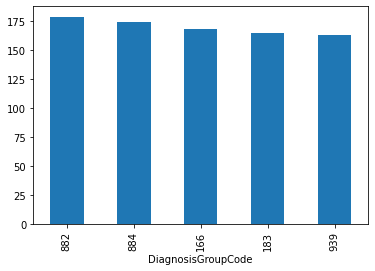

In [211]:
inpatient.groupby('DiagnosisGroupCode')['ClaimID'].count().sort_values(ascending=False).head(5).plot.bar()


<AxesSubplot:xlabel='ClmAdmitDiagnosisCode'>

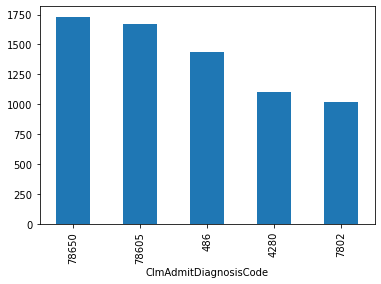

In [117]:
inpatient.groupby('ClmAdmitDiagnosisCode')['ClaimID'].count().sort_values(ascending=False).head(5).plot.bar()


In [217]:
inpatient.groupby('PotentialFraud')['Provider'].count()

PotentialFraud
No     17072
Yes    23402
Name: Provider, dtype: int64

In [210]:
inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'Total_Chronic', 'DOB', 'Age', 'PotentialFraud',
       'Days_Admitted', 'Claim_Diag_Total', 'Total_Claims_Amount',
       'Claim Type', 'Claim Duration', 'ClmProcedureCode',
       'Claim_Procedure_Total'],
      dtype='object')

In [143]:
inpatient['ClmProcedureCode'] = inpatient['ClmProcedureCode_1']

In [146]:
inpatient['ClmProcedureCode_1'] = np.where(inpatient.ClmProcedureCode_1.isnull(), 0, 1)
inpatient['ClmProcedureCode_2'] = np.where(inpatient.ClmProcedureCode_2.isnull(), 0, 1)
inpatient['ClmProcedureCode_3'] = np.where(inpatient.ClmProcedureCode_3.isnull(), 0, 1)
inpatient['ClmProcedureCode_4'] = np.where(inpatient.ClmProcedureCode_4.isnull(), 0, 1)
inpatient['ClmProcedureCode_5'] = np.where(inpatient.ClmProcedureCode_5.isnull(), 0, 1)

In [149]:
inpatient['Claim_Procedure_Total'] = inpatient['ClmProcedureCode_1'] + inpatient['ClmProcedureCode_2'] + \
inpatient['ClmProcedureCode_3']+ inpatient['ClmProcedureCode_4'] + inpatient['ClmProcedureCode_5']

In [154]:
#inpatient = inpatient.drop(['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5'], axis=1)

In [160]:
inpatient.rename(columns = {'total_chronic':'Total_Chronic', 'days_admitted':'Days_Admitted'}, inplace = True)

In [124]:
# age of patients at date of claim
inpatient.groupby('Age')[['BeneID']].count()

,BeneID
Age,
25,3
26,41
27,68
28,60
29,60
...,...
97,275
98,237
99,239


<AxesSubplot:>

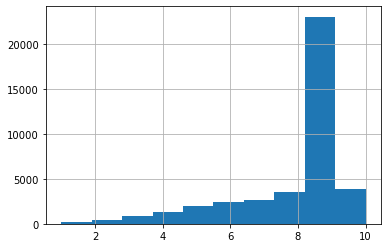

In [136]:
inpatient.Claim_Diag_Total.hist()

<AxesSubplot:>

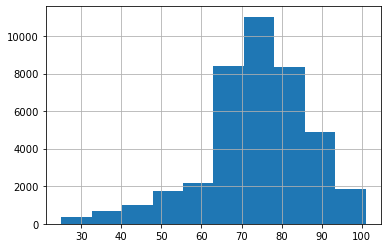

In [137]:
inpatient.Age.hist()

In [223]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,DOB,Age,PotentialFraud,Days_Admitted,Claim_Diag_Total,Total_Claims_Amount,Claim Type,Claim Duration,ClmProcedureCode,Claim_Procedure_Total
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,PHY390922,NaN,NaN,2009-04-12,7866,...,1943-01-01,66,Yes,6,9,27068.0,Inpatient,6 days,NaN,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,PHY318495,PHY318495,NaN,2009-08-31,6186,...,1943-01-01,67,No,2,3,6068.0,Inpatient,2 days,7092.0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,PHY372395,NaN,PHY324689,2009-09-17,29590,...,1943-01-01,67,No,3,6,6068.0,Inpatient,3 days,NaN,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,PHY369659,PHY392961,PHY349768,2009-02-14,431,...,1914-03-01,95,No,8,9,6068.0,Inpatient,8 days,331.0,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,PHY379376,PHY398258,NaN,2009-08-13,78321,...,1938-04-01,71,No,17,9,11068.0,Inpatient,17 days,3893.0,1


In [221]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   BeneID                 40474 non-null  object         
 1   ClaimID                40474 non-null  object         
 2   ClaimStartDt           40474 non-null  datetime64[ns] 
 3   ClaimEndDt             40474 non-null  datetime64[ns] 
 4   Provider               40474 non-null  object         
 5   AttendingPhysician     40362 non-null  object         
 6   OperatingPhysician     23830 non-null  object         
 7   OtherPhysician         4690 non-null   object         
 8   AdmissionDt            40474 non-null  object         
 9   ClmAdmitDiagnosisCode  40474 non-null  object         
 10  DischargeDt            40474 non-null  object         
 11  DiagnosisGroupCode     40474 non-null  object         
 12  Total_Chronic          40474 non-null  int64  

#### Do potential fraud providers charge more claims?

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Chronic', ylabel='Total_Claims_Amount'>

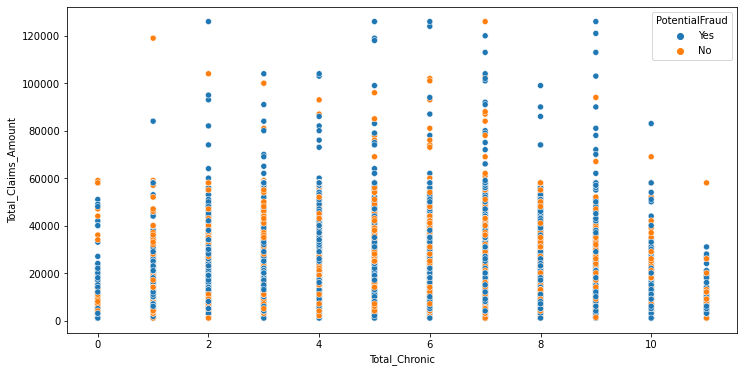

In [475]:
# import seaborn as sns
rcParams['figure.figsize'] = 12, 6
sns.scatterplot('Total_Chronic', 'Total_Claims_Amount', data=inpatient, hue='PotentialFraud')

In [602]:
chronic_claimamount = inpatient[['Total_Chronic','Total_Claims_Amount', 'PotentialFraud']]

In [603]:
chronic_claimamount.to_csv('chronic_claimamount.csv')

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Total_Claims_Amount'>

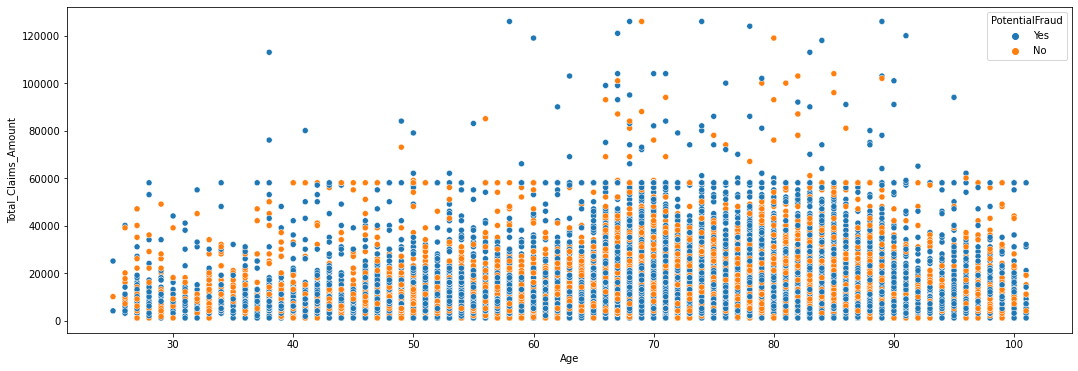

In [247]:
sns.scatterplot('Age', 'Total_Claims_Amount', data=inpatient, hue='PotentialFraud')

In [341]:
inpatient.groupby(['Age', 'PotentialFraud'])[['Total_Claims_Amount']].mean().head(50)

Total_Claims_Amount
Age PotentialFraud                     
25  No                     10068.000000
    Yes                    14568.000000
26  No                     10715.619048
    Yes                     9018.000000
27  No                     10503.897436
    Yes                    11603.714286
28  No                     10308.000000
    Yes                    12682.705882
29  No                      9830.857143
    Yes                    10720.173913
30  No                      8782.285714
    Yes                     9197.032258
31  No                      8345.777778
    Yes                    11957.285714
32  No                     10425.142857
    Yes                    10298.769231
33  No                     10474.250000
    Yes                    11298.769231
34  No                     11950.352941
    Yes                    10137.767442
35  No                      9768.000000
    Yes                     7668.000000
36  No                     11204.363636
    Yes                    10047.591837
37  No                     10902.062500
    Yes                     8881.559322
38  No                     12937.230769
    Yes                    13416.333333
39  No                     10475.500000
    Yes                     9358.909091
40  No                      9761.617021
    Yes                    11009.666667
41  No                      9894.086957
    Yes                    10327.210526
42  No                     10950.352941
    Yes                    11680.903226
43  No                     10310.424242
    Yes                    12893.396825
44  No                      9561.333333
    Yes                    12568.000000
45  No                     11017.122807
    Yes                     8274.349206
46  No                     11546.260870
    Yes                    10328.756303
47  No                     10997.411765
    Yes                    11229.206897
48  No                      9000.500000
    Yes                    10750.539683
49  No                      9649.734694
    Yes                    10843.806452

<AxesSubplot:title={'center':'Total_Claims_Amount'}, xlabel='PotentialFraud'>

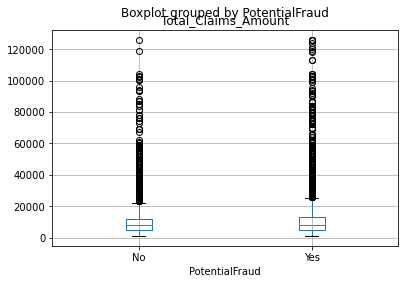

In [233]:
*** choose better way to represent this ***
line chart by age

inpatient.boxplot(by='PotentialFraud', column=['Total_Claims_Amount'])

In [455]:
inpatient['Claim Duration'].mean()

5.6602510253496074

<AxesSubplot:title={'center':'Claim Duration'}, xlabel='PotentialFraud'>

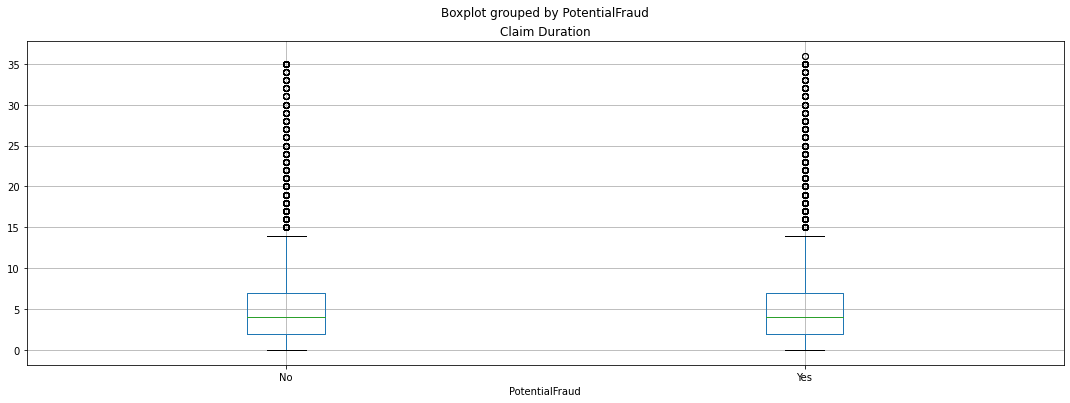

In [454]:
# inpatient['Claim Duration'] = inpatient['Claim Duration'].dt.days

inpatient.boxplot(by='PotentialFraud', column=['Claim Duration'])

<AxesSubplot:xlabel='Age'>

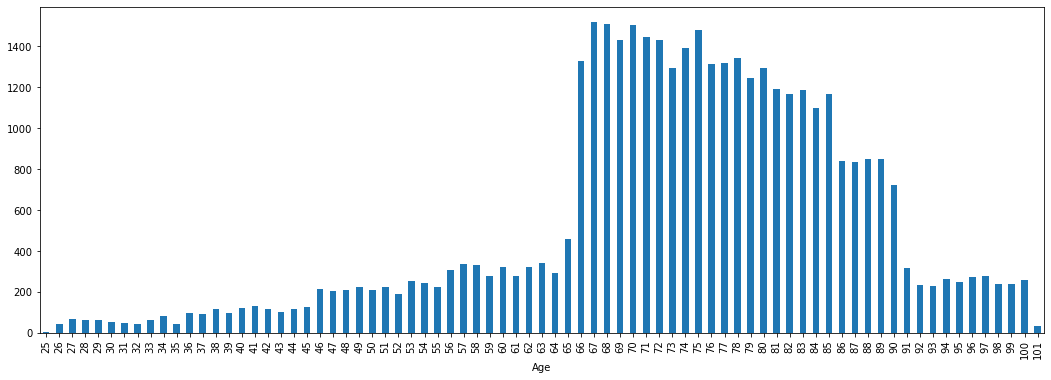

In [250]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 6
inpatient.groupby('Age')['Claim_Procedure_Total'].agg('count').plot.bar()

<AxesSubplot:xlabel='Age'>

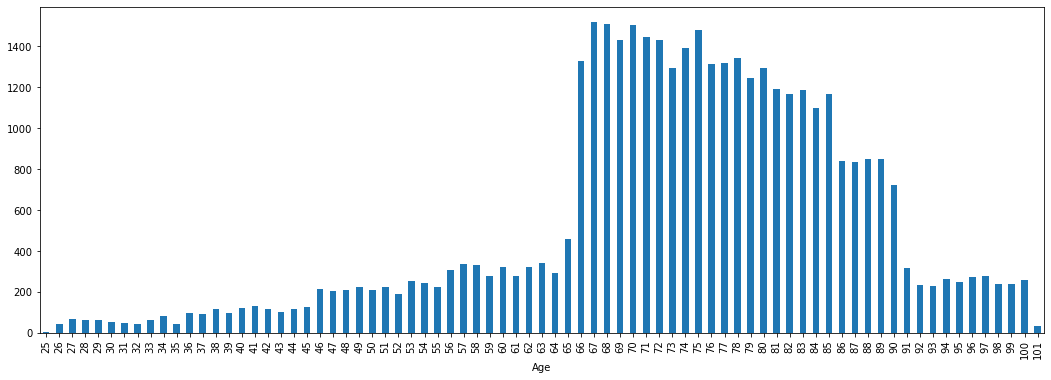

In [251]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 6
inpatient.groupby('Age')['Claim_Diag_Total'].agg('count').plot.bar()

<AxesSubplot:xlabel='Age'>

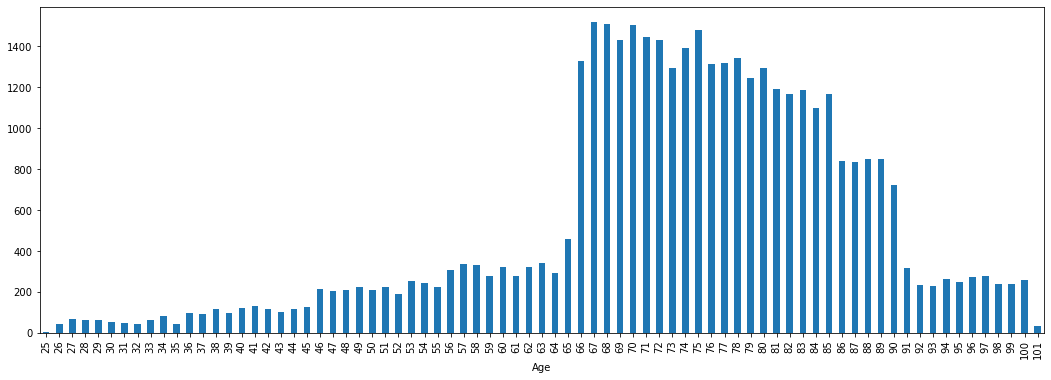

In [342]:
inpatient.groupby('Age')['Days_Admitted'].agg('count').plot.bar()

In [259]:
inpatient.groupby('Age')['BeneID'].nunique().reset_index(name = 'count')

,Age,count
0,25,3
1,26,34
2,27,57
3,28,48
4,29,44
...,...,...
72,97,220
73,98,186
74,99,199
75,100,195


In [261]:
#total unique patients for potential fraud v not fraud provider
inpatient.groupby('PotentialFraud')['BeneID'].nunique().reset_index(name = 'Unique Count')

,PotentialFraud,Unique Count
0,No,14602
1,Yes,19284


#### is there a difference in overall distribution of num of days admitted (Fraud v No Fraud)

In [ ]:
days_admitted = inpatient[['Days_Admitted', 'PotentialFraud']]

In [284]:
days_admitted = days_admitted.pivot_table(values='Days_Admitted', index=days_admitted.index, columns='PotentialFraud', aggfunc='first')

<AxesSubplot:ylabel='Density'>

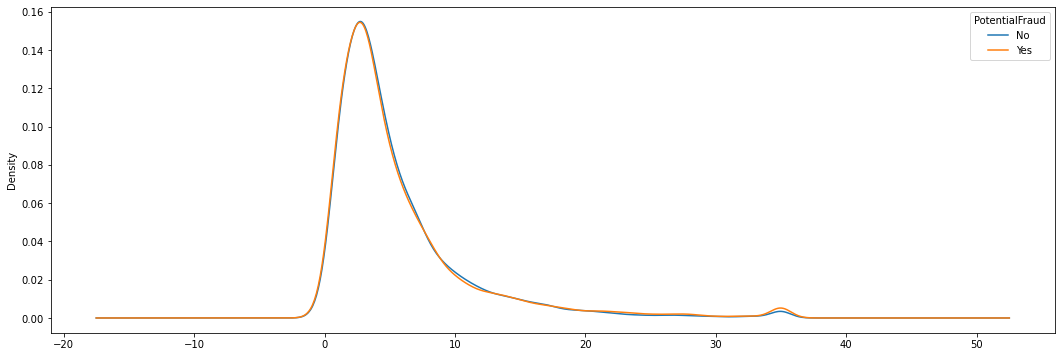

In [309]:
days_admitted.plot.density()
#Distribution of days admitted

#### Age and avg days admitted (Fraud v No Fraud)

In [330]:
days_admitted_age = inpatient.groupby(['Age', 'PotentialFraud'])['Days_Admitted'].mean().reset_index(name = 'Mean')

In [331]:
days_admitted_age

,Age,PotentialFraud,Mean
0,25,No,12.000000
1,25,Yes,5.000000
2,26,No,6.571429
3,26,Yes,5.750000
4,27,No,4.950000
...,...,...,...
149,99,Yes,5.022727
150,100,No,6.389381
151,100,Yes,6.111111
152,101,No,5.200000


In [335]:
# days_admitted_age.pivot_table(values='Mean', index=days_admitted_age.index, columns=['PotentialFraud'], aggfunc='first')

,Age,PotentialFraud,Mean
0,25,No,12.000000
2,26,No,6.571429
4,27,No,4.950000
6,28,No,4.961538
8,29,No,5.171429
...,...,...,...
144,97,No,6.026786
146,98,No,4.781818
148,99,No,6.747664
150,100,No,6.389381


In [336]:
days_admitted_age.to_csv('days_admitted_age.csv')

In [337]:
inpatient.to_csv('inpatient_pd.csv')

In [328]:
days_admitted_age[days_admitted_age['Age'] > 65]

,Age,PotentialFraud,Count
82,66,No,5.074523
83,66,Yes,5.916335
84,67,No,5.489985
85,67,Yes,5.541379
86,68,No,5.681090
...,...,...,...
149,99,Yes,5.022727
150,100,No,6.389381
151,100,Yes,6.111111
152,101,No,5.200000


### Outpatient

In [198]:
outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'total_chronic', 'DOB', 'Age',
       'PotentialFraud', 'Claim Duration', 'ClmDiagnosisCode',
       'Claim_Diag_Total', 'ClmProcedureCode', 'Claim_Procedure_Total',
       'Total_Claims_Amount', 'Claim Type'],
      dtype='object')

In [197]:
inpatient.columns
#AdmissionDt, DischargeDt, DiagnosisGroupCode, Days_Admitted

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'Total_Chronic', 'DOB', 'Age', 'PotentialFraud',
       'Days_Admitted', 'Claim_Diag_Total', 'Total_Claims_Amount',
       'Claim Type', 'Claim Duration', 'ClmProcedureCode',
       'Claim_Procedure_Total'],
      dtype='object')

In [170]:
outpatient['ClaimStartDt']= pd.to_datetime(outpatient['ClaimStartDt'])
outpatient['ClaimEndDt']= pd.to_datetime(outpatient['ClaimEndDt'])

In [171]:
outpatient['Claim Duration'] = outpatient['ClaimEndDt'] - outpatient['ClaimStartDt']

In [172]:
outpatient['ClmDiagnosisCode'] = outpatient['ClmDiagnosisCode_1']

In [173]:
outpatient['ClmDiagnosisCode_1'] = np.where(outpatient.ClmDiagnosisCode_1.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_2'] = np.where(outpatient.ClmDiagnosisCode_2.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_3'] = np.where(outpatient.ClmDiagnosisCode_3.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_4'] = np.where(outpatient.ClmDiagnosisCode_4.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_5'] = np.where(outpatient.ClmDiagnosisCode_5.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_6'] = np.where(outpatient.ClmDiagnosisCode_6.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_7'] = np.where(outpatient.ClmDiagnosisCode_7.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_8'] = np.where(outpatient.ClmDiagnosisCode_8.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_9'] = np.where(outpatient.ClmDiagnosisCode_9.isnull(), 0, 1)
outpatient['ClmDiagnosisCode_10'] = np.where(outpatient.ClmDiagnosisCode_10.isnull(), 0, 1)

In [174]:
outpatient['Claim_Diag_Total'] = outpatient['ClmDiagnosisCode_1'] + outpatient['ClmDiagnosisCode_2'] + \
outpatient['ClmDiagnosisCode_3']+ outpatient['ClmDiagnosisCode_4'] + outpatient['ClmDiagnosisCode_5'] + \
outpatient['ClmDiagnosisCode_6']+ outpatient['ClmDiagnosisCode_7'] + outpatient['ClmDiagnosisCode_8'] + \
outpatient['ClmDiagnosisCode_9']+ outpatient['ClmDiagnosisCode_10']

In [175]:
outpatient = outpatient.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                           'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10'], axis=1)

In [176]:
outpatient['ClmProcedureCode'] = outpatient['ClmProcedureCode_1']

In [177]:
outpatient['ClmProcedureCode_1'] = np.where(outpatient.ClmProcedureCode_1.isnull(), 0, 1)
outpatient['ClmProcedureCode_2'] = np.where(outpatient.ClmProcedureCode_2.isnull(), 0, 1)
outpatient['ClmProcedureCode_3'] = np.where(outpatient.ClmProcedureCode_3.isnull(), 0, 1)
outpatient['ClmProcedureCode_4'] = np.where(outpatient.ClmProcedureCode_4.isnull(), 0, 1)

In [178]:
outpatient['Claim_Procedure_Total'] = outpatient['ClmProcedureCode_1'] + outpatient['ClmProcedureCode_2'] + \
outpatient['ClmProcedureCode_3'] + outpatient['ClmProcedureCode_4']

In [179]:
outpatient = outpatient.drop(['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4'], axis=1)

In [187]:
outpatient = outpatient.drop(['ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1)

In [181]:
outpatient['Total_Claims_Amount'] = round((outpatient['DeductibleAmtPaid'] + outpatient['InscClaimAmtReimbursed']))

In [182]:
outpatient = outpatient.drop(['DeductibleAmtPaid', 'InscClaimAmtReimbursed'], axis=1)

In [189]:
outpatient['Claim Type'] = 'Outpatient'

In [205]:
outpatient.rename(columns = {'total_chronic':'Total_Chronic'}, inplace = True)

### Master Patient Table

In [208]:
outpatient.columns
op = outpatient[['BeneID', 'ClaimID', 'Claim Type', 'Provider', 'PotentialFraud', 'ClmAdmitDiagnosisCode', 
            'Claim_Diag_Total', 'ClaimStartDt', 'Claim Duration', 'ClmProcedureCode', 
            'Claim_Procedure_Total', 'Total_Chronic', 'DOB', 'Age', 'Total_Claims_Amount']]

In [213]:
inpatient.columns
ip = inpatient[['BeneID', 'ClaimID', 'Claim Type', 'Provider', 'PotentialFraud', 'ClmAdmitDiagnosisCode', 
            'Claim_Diag_Total', 'ClaimStartDt', 'Claim Duration', 'ClmProcedureCode', 
            'Claim_Procedure_Total', 'Total_Chronic', 'DOB', 'Age', 'Total_Claims_Amount']]

In [351]:
patient = pd.concat([ip, op])

In [651]:
# patient = patient[patient['ClaimStartDt_YM'] != '2008-12']
patient = patient[patient['ClaimStartDt_YM'] != '2008-11']

#### On Avg, Providers that are flagged as Fraudulent, make more claim diag, more procedure diag, and higher claims amount

In [352]:
patient.groupby(['PotentialFraud']).mean()

,Claim_Diag_Total,ClmProcedureCode,Claim_Procedure_Total,Total_Chronic,Age,Total_Claims_Amount
PotentialFraud,,,,,,
No,2.884988,5866.282240,0.036133,4.471734,73.215671,796.612876
Yes,3.215277,5917.770334,0.081839,4.542252,73.433288,1482.455867


<AxesSubplot:xlabel='Provider Flag', ylabel='Avg # of Diagnosis Claims'>

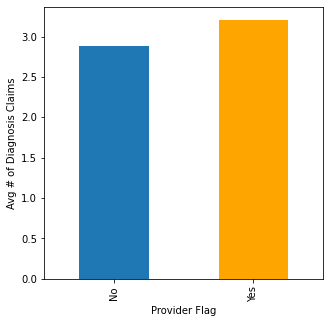

In [632]:
#Avg Number of Diagnosis Claims
patient.groupby(['PotentialFraud'])['Claim_Diag_Total'].mean().plot.bar(figsize=(5,5), color=['#1f77b4', 'orange'], xlabel='Provider Flag', ylabel='Avg # of Diagnosis Claims')

<AxesSubplot:xlabel='Provider Flag', ylabel='Avg # of Procedure Claims'>

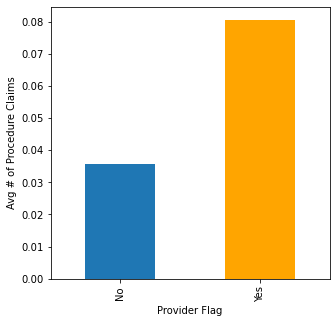

In [633]:
#Avg Number of Procedure Claims
patient.groupby(['PotentialFraud'])['Claim_Procedure_Total'].mean().plot.bar(figsize=(5,5), color=['#1f77b4', 'orange'], xlabel='Provider Flag', ylabel='Avg # of Procedure Claims')

<AxesSubplot:xlabel='Provider Flag', ylabel='Avg Total Cost of Claims'>

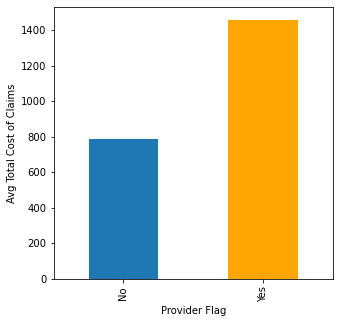

In [634]:
#Avg Claims Amount
patient.groupby(['PotentialFraud'])['Total_Claims_Amount'].mean().plot.bar(figsize=(5,5), color=['#1f77b4', 'orange'], xlabel='Provider Flag', ylabel='Avg Total Cost of Claims')

In [371]:
patient.columns

Index(['BeneID', 'ClaimID', 'Claim Type', 'Provider', 'PotentialFraud',
       'ClmAdmitDiagnosisCode', 'Claim_Diag_Total', 'ClaimStartDt',
       'Claim Duration', 'ClmProcedureCode', 'Claim_Procedure_Total',
       'Total_Chronic', 'DOB', 'Age', 'Total_Claims_Amount'],
      dtype='object')

#### Avg claims per provider per patient

In [413]:
provider_claims = patient.groupby(['Provider'])['BeneID'].agg(['count', 'nunique']).reset_index()

In [414]:
provider_claims['Avg Claims'] = provider_claims['count'] / provider_claims['nunique']

In [421]:
provider_claims.sort_values(by='Avg Claims', ascending=False)

,Provider,count,nunique,Avg Claims
3510,PRV55405,10,1,10.0
4305,PRV56381,8,1,8.0
3084,PRV54862,7,1,7.0
1756,PRV53191,15,3,5.0
4781,PRV56990,55,11,5.0
...,...,...,...,...
916,PRV52147,211,211,1.0
2978,PRV54710,2,2,1.0
2979,PRV54711,2,2,1.0
4080,PRV56106,2,2,1.0


<AxesSubplot:ylabel='Frequency'>

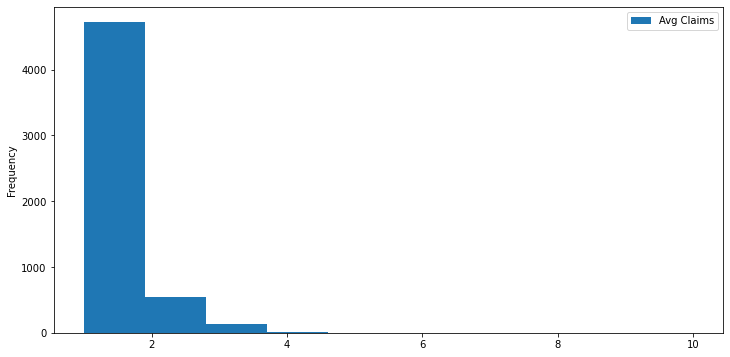

In [635]:
provider_claims[['Provider', 'Avg Claims']].plot.hist()

In [ ]:
#most providers process 1-3 claims per patient but there are a few that process 5+

In [424]:
provider_claims['count']

0         25
1        132
2        149
3       1165
4         72
        ... 
5405      28
5406      22
5407      82
5408       1
5409     118
Name: count, Length: 5410, dtype: int64

In [432]:
provider_claims = pd.merge(provider_claims, provider_potential, on= "Provider")

In [433]:
provider_claims

,Provider,count,nunique,Avg Claims,PotentialFraud
0,PRV51001,25,24,1.041667,No
1,PRV51003,132,117,1.128205,Yes
2,PRV51004,149,138,1.079710,No
3,PRV51005,1165,495,2.353535,Yes
4,PRV51007,72,58,1.241379,No
...,...,...,...,...,...
5405,PRV57759,28,24,1.166667,No
5406,PRV57760,22,9,2.444444,No
5407,PRV57761,82,67,1.223881,No
5408,PRV57762,1,1,1.000000,No


array([[<AxesSubplot:title={'center':'Avg Claims'}>]], dtype=object)

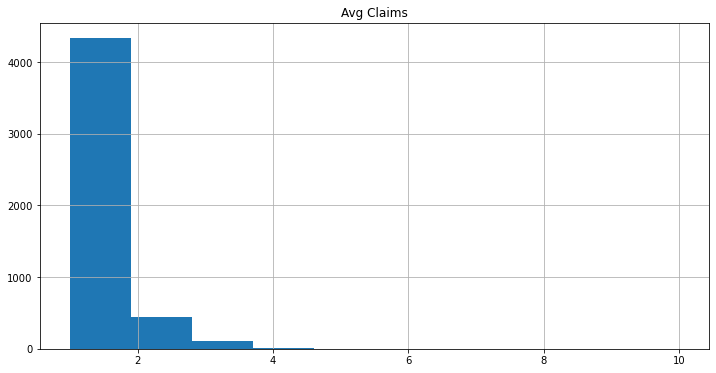

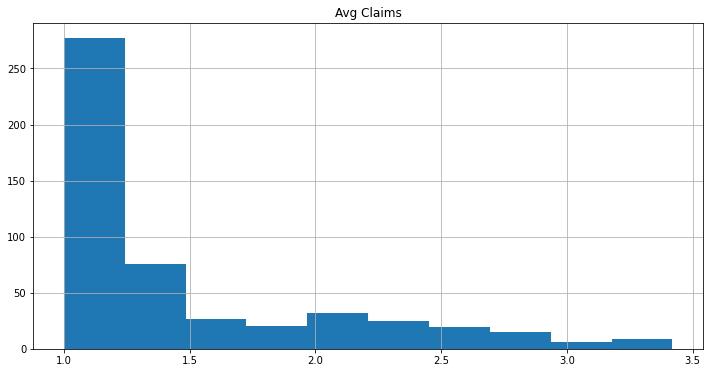

In [636]:
provider_claims[provider_claims['PotentialFraud'] == 'No'][['Avg Claims']].hist()
provider_claims[provider_claims['PotentialFraud'] == 'Yes'][['Avg Claims']].hist()

#potential fraud providers process more claims per patient

In [623]:
patient.columns

Index(['BeneID', 'ClaimID', 'Claim Type', 'Provider', 'PotentialFraud',
       'ClmAdmitDiagnosisCode', 'Claim_Diag_Total', 'ClaimStartDt',
       'Claim Duration', 'ClmProcedureCode', 'Claim_Procedure_Total',
       'Total_Chronic', 'DOB', 'Age', 'Total_Claims_Amount', 'ClaimStartDt_YM',
       'ClaimStartDt_W'],
      dtype='object')

#### Identify the top 5 most frequent **ClmAdmitDiagnosisCodes** and trace their Monthly seasonalities.

In [485]:
patient['ClaimStartDt_YM'] = pd.to_datetime(patient['ClaimStartDt']).dt.strftime('%Y-%m')

In [499]:
patient.groupby('ClmAdmitDiagnosisCode')[['ClaimID']].count().sort_values(by='ClaimID', ascending=False).head(5)

,ClaimID
ClmAdmitDiagnosisCode,
V7612,4074
42731,3634
78605,2992
4019,2732
25000,2368


In [566]:
top_diag = patient[patient['ClmAdmitDiagnosisCode'].isin(['V7612', '42731', '78605', '4019', '25000'])]

In [567]:
top_diag.head()

,BeneID,ClaimID,Claim Type,Provider,PotentialFraud,ClmAdmitDiagnosisCode,Claim_Diag_Total,ClaimStartDt,Claim Duration,ClmProcedureCode,Claim_Procedure_Total,Total_Chronic,DOB,Age,Total_Claims_Amount,ClaimStartDt_YM
7,BENE11028,CLM62376,Inpatient,PRV51148,Yes,78605,9,2009-08-03,4 days,9904.0,1,3,1941-12-01,68,7068.0,2009-08
10,BENE11034,CLM57949,Inpatient,PRV55193,Yes,78605,9,2009-07-01,8 days,9672.0,1,9,1946-03-01,63,103068.0,2009-07
20,BENE11057,CLM36789,Inpatient,PRV51393,Yes,78605,9,2009-02-03,35 days,3995.0,1,6,1933-02-01,76,NaN,2009-02
28,BENE11071,CLM48802,Inpatient,PRV55023,No,78605,9,2009-04-28,5 days,NaN,0,6,1954-11-01,54,6068.0,2009-04
43,BENE11147,CLM78387,Inpatient,PRV51140,No,78605,8,2009-12-04,4 days,NaN,0,7,1933-04-01,77,3068.0,2009-12


In [569]:
top_diag = top_diag.groupby(['ClmAdmitDiagnosisCode', 'ClaimStartDt_YM'])[['ClaimID']].count().reset_index()

In [607]:
top_diag = top_diag[top_diag['ClaimStartDt_YM'] != '2008-12']

In [608]:
top_diag.pivot(index='ClaimStartDt_YM', columns='ClmAdmitDiagnosisCode', values='ClaimID')

ClmAdmitDiagnosisCode,25000,4019,42731,78605,V7612
ClaimStartDt_YM,,,,,
2009-01,363,356,470,361,595
2009-02,285,288,381,286,491
2009-03,274,342,387,327,469
2009-04,241,292,393,263,428
2009-05,253,253,368,254,402
2009-06,200,246,291,245,314
2009-07,170,188,296,247,305
2009-08,131,190,279,228,290
2009-09,150,191,233,216,252


<AxesSubplot:xlabel='ClaimStartDt_YM'>

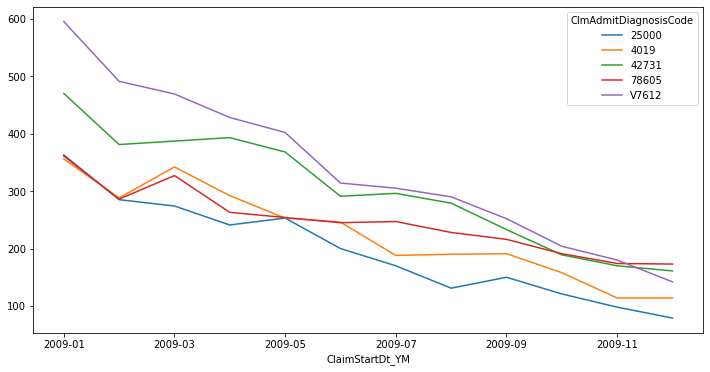

In [637]:
top_diag.pivot(index='ClaimStartDt_YM', columns='ClmAdmitDiagnosisCode', values='ClaimID').plot()

In [624]:
# for code in top_diag.ClmAdmitDiagnosisCode.unique():
#     code_df = top_diag[top_diag['ClmAdmitDiagnosisCode'] == code]
#     plt.plot(code_df['ClaimStartDt_YM'], code_df['ClaimID'], label=code)

# code_1 = top_diag[top_diag['ClmAdmitDiagnosisCode'] == 'V7612'][['ClaimID']]
# code_2 = top_diag[top_diag['ClmAdmitDiagnosisCode'] == '42731'][['ClaimID']]
# code_3 = top_diag[top_diag['ClmAdmitDiagnosisCode'] == '78605'][['ClaimID']]
# code_4 = top_diag[top_diag['ClmAdmitDiagnosisCode'] == '4019'][['ClaimID']]
# code_5 = top_diag[top_diag['ClmAdmitDiagnosisCode'] == '25000'][['ClaimID']]

In [653]:
patient.groupby('ClmProcedureCode')[['ClaimID']].count().sort_values(by='ClaimID', ascending=False).head(5)
#9904.0, 8154.0, 66.0, 3893.0, 3995.0

,ClaimID
ClmProcedureCode,
9904.0,1130
8154.0,1008
66.0,895
3893.0,840
3995.0,795


In [654]:
top_procedure = patient[patient['ClmProcedureCode'].isin([9904.0, 8154.0, 66.0, 3893.0, 3995.0])]

In [655]:
top_procedure = top_procedure.groupby(['ClmProcedureCode', 'ClaimStartDt_YM'])[['ClaimID']].count().reset_index()

<AxesSubplot:xlabel='ClaimStartDt_YM'>

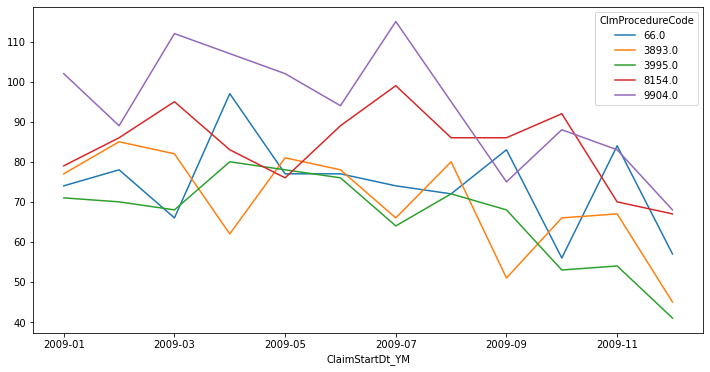

In [656]:
top_procedure.pivot(index='ClaimStartDt_YM', columns='ClmProcedureCode', values='ClaimID').plot()

#### Identify the top 5 most frequent **ClmAdmitDiagnosisCodes** and trace their Monthly seasonalities.

In [661]:
patient['ClaimStartDt_W'] = pd.to_datetime(patient['ClaimStartDt']).dt.isocalendar().week

In [662]:
top_diagW = patient[patient['ClmAdmitDiagnosisCode'].isin(['V7612', '42731', '78605', '4019', '25000'])]

In [663]:
top_diagW = top_diagW.groupby(['ClmAdmitDiagnosisCode', 'ClaimStartDt_W'])[['ClaimID']].count().reset_index()

<AxesSubplot:xlabel='ClaimStartDt_W'>

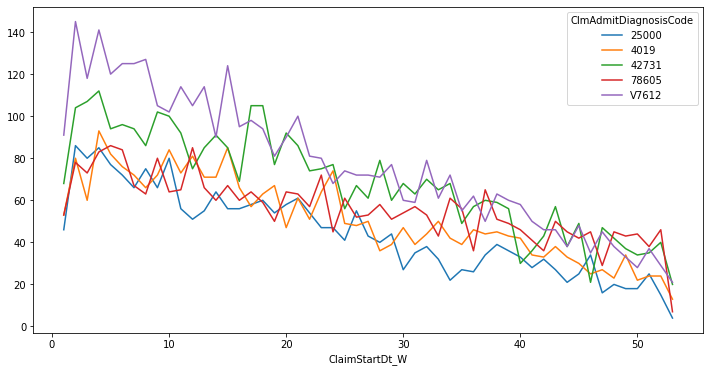

In [664]:
top_diagW.pivot(index='ClaimStartDt_W', columns='ClmAdmitDiagnosisCode', values='ClaimID').plot()

In [643]:
top_diagW.pivot(index='ClaimStartDt_W', columns='ClmAdmitDiagnosisCode', values='ClaimID').head(10)

ClmAdmitDiagnosisCode,25000,4019,42731,78605,V7612
ClaimStartDt_W,,,,,
1,46,53,68,53,91
2,86,80,104,78,145
3,80,60,107,73,118
4,85,93,112,83,141
5,77,82,94,86,120
6,72,76,96,84,125
7,66,72,94,67,125
8,75,66,86,63,127
9,66,72,102,80,105


#### How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?

In [533]:
patients['Claim Duration'] = patients['Claim Duration'].astype('timedelta64[D]')

In [523]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   BeneID                 558211 non-null  object         
 1   ClaimID                558211 non-null  object         
 2   Claim Type             558211 non-null  object         
 3   Provider               558211 non-null  object         
 4   PotentialFraud         558211 non-null  object         
 5   ClmAdmitDiagnosisCode  145899 non-null  object         
 6   Claim_Diag_Total       558211 non-null  int64          
 7   ClaimStartDt           558211 non-null  datetime64[ns] 
 8   Claim Duration         558211 non-null  timedelta64[ns]
 9   ClmProcedureCode       23310 non-null   float64        
 10  Claim_Procedure_Total  558211 non-null  int64          
 11  Total_Chronic          558211 non-null  int64          
 12  DOB                    558211 

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claim Duration', ylabel='Total_Claims_Amount'>

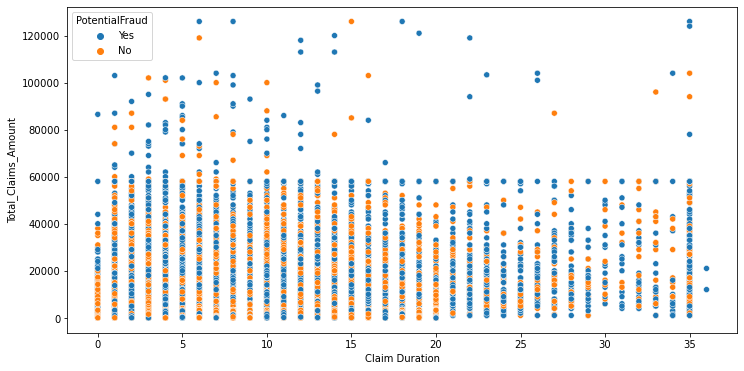

In [534]:
sns.scatterplot('Claim Duration', 'Total_Claims_Amount', data=patients, hue='PotentialFraud')

### Beneficiary

In [368]:
bene.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,total_chronic
0,BENE11001,1,1,0,39,230,1,0,1,0,...,1,1,0,1,1,36000,3204,60,70,7
1,BENE11002,2,1,0,39,280,0,0,0,0,...,0,0,0,0,0,0,0,30,50,0
2,BENE11003,1,1,0,52,590,1,0,0,0,...,0,1,0,0,0,0,0,90,40,2
3,BENE11004,1,1,0,39,270,1,1,0,0,...,1,1,1,1,0,0,0,1810,760,6
4,BENE11005,1,1,0,24,680,0,0,0,0,...,1,0,0,0,0,0,0,1790,1200,2


In [372]:
bene_merge = bene[['BeneID', 'Gender', 'Race']]

In [374]:
patients = pd.merge(patient, bene_merge, on='BeneID', how='left')

In [375]:
patient.to_csv('patient.csv')

In [545]:
# bene.groupby(['total_chronic'])[['BeneID']].count()
bene['BeneID'].nunique()
#138556 unique patients

138556

In [553]:
chronic_count = bene.groupby(['total_chronic'])[['BeneID']].count().reset_index()

In [554]:
chronic_count['Percent'] = chronic_count['BeneID'] / 138556

In [555]:
chronic_count

,total_chronic,BeneID,Percent
0,0,11276,0.081382
1,1,16237,0.117187
2,2,19440,0.140304
3,3,20335,0.146764
4,4,20146,0.145400
5,5,17500,0.126303
6,6,14363,0.103662
7,7,10235,0.073869
8,8,5892,0.042524
9,9,2477,0.017877


<AxesSubplot:xlabel='total_chronic'>

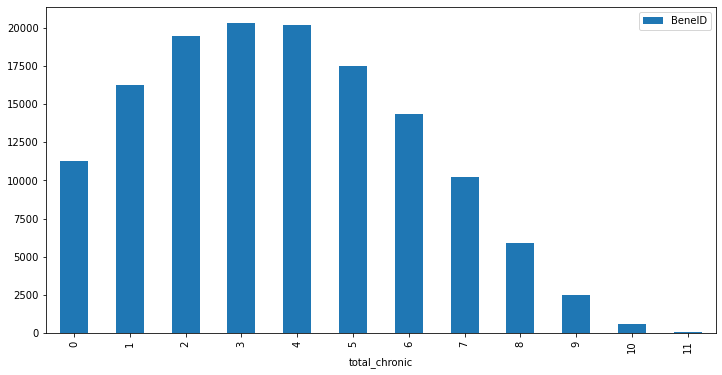

In [542]:
bene.groupby(['total_chronic'])[['BeneID']].count().plot.bar()


<AxesSubplot:>

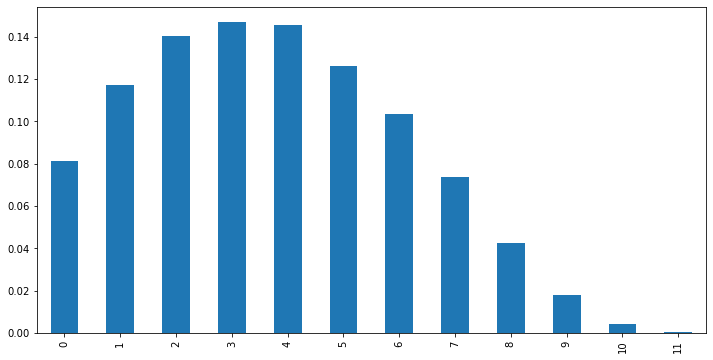

In [556]:
chronic_count['Percent'].plot.bar()

In [ ]:
# large percentage of patients have 2-4 chronic conditions

In [558]:
bene.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,total_chronic
0,BENE11001,1,1,0,39,230,1,0,1,0,...,1,1,0,1,1,36000,3204,60,70,7
1,BENE11002,2,1,0,39,280,0,0,0,0,...,0,0,0,0,0,0,0,30,50,0
2,BENE11003,1,1,0,52,590,1,0,0,0,...,0,1,0,0,0,0,0,90,40,2
3,BENE11004,1,1,0,39,270,1,1,0,0,...,1,1,1,1,0,0,0,1810,760,6
4,BENE11005,1,1,0,24,680,0,0,0,0,...,1,0,0,0,0,0,0,1790,1200,2
